In [1]:
epochs = 5
batch_size = 16
vocabulary_size = 5000
max_sentence_lenght = 100

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_df = pd.read_csv('./Drugs/drugsComTrain_raw.tsv', delimiter='\t')
train_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
test_df = pd.read_csv('./Drugs/drugsComTest_raw.tsv', delimiter='\t')
test_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [5]:
def categorize(arr, split_values=[10,20,30]):
    result = np.zeros(arr.shape)
    for i, s in enumerate(split_values):
        result[arr > s] = i+1
    return result

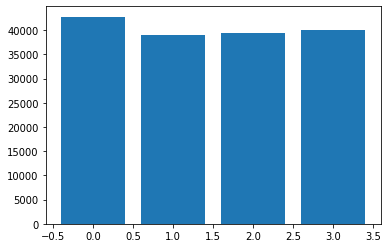

Wall time: 162 ms


In [6]:
%%time
split_values = [6,16,36]
train_labels = categorize(train_df['usefulCount'], split_values)
test_labels = categorize(test_df['usefulCount'], split_values)

categories, unique_counts = np.unique(train_labels, return_counts=1)
category_count = len(categories)

plt.bar(range(category_count), unique_counts)
plt.show()

In [7]:
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [8]:
def clean(text_arr, stopwords=[], filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r1234567890'):
    result = []
    for sample in text_arr:
        sample = sample.lower()
        for c in filters:
            sample = sample.replace(c, '')            
        for word in stopwords:
            sample = sample.replace(f' {word} ', ' ', )            
        sample = ' '.join(sample.split())            
        result.append(sample)        
    return result

In [9]:
train_samples = clean(train_df['review'], stopwords)
test_samples = clean(test_df['review'], stopwords)

print(train_samples[0])

it side effect take combination bystolic mg fish oil


In [10]:
%%time
# Build up the word index (only 5000 most common words)

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocabulary_size)
tokenizer.fit_on_texts(train_samples)


Wall time: 10.3 s


In [11]:
# Convert reviews to integer sequences

train_sequences = tokenizer.texts_to_sequences(train_samples)
test_sequences = tokenizer.texts_to_sequences(test_samples)

In [12]:
tokenizer.word_index

{'i': 1,
 'day': 2,
 'im': 3,
 'side': 4,
 'taking': 5,
 'years': 6,
 'ive': 7,
 'first': 8,
 'pain': 9,
 'effects': 10,
 'take': 11,
 'mg': 12,
 'months': 13,
 'started': 14,
 'like': 15,
 'get': 16,
 'days': 17,
 'time': 18,
 'feel': 19,
 'would': 20,
 'back': 21,
 'pill': 22,
 'one': 23,
 'weeks': 24,
 'week': 25,
 'also': 26,
 'took': 27,
 'period': 28,
 'doctor': 29,
 'medication': 30,
 'weight': 31,
 'got': 32,
 'month': 33,
 'since': 34,
 'dont': 35,
 'life': 36,
 'still': 37,
 'bad': 38,
 'really': 39,
 'much': 40,
 'anxiety': 41,
 'never': 42,
 'went': 43,
 'better': 44,
 'medicine': 45,
 'two': 46,
 'work': 47,
 'felt': 48,
 'well': 49,
 'every': 50,
 'control': 51,
 'didnt': 52,
 'good': 53,
 'year': 54,
 'even': 55,
 'great': 56,
 'go': 57,
 'night': 58,
 'sleep': 59,
 'ago': 60,
 'tried': 61,
 'works': 62,
 'acne': 63,
 'birth': 64,
 'made': 65,
 'little': 66,
 'drug': 67,
 'last': 68,
 'hours': 69,
 'going': 70,
 'dose': 71,
 'depression': 72,
 'prescribed': 73,
 'worked'

In [13]:
# Pad the reviews to have the same length

from tensorflow.keras import preprocessing

train_sequences = preprocessing.sequence.pad_sequences(train_sequences, maxlen = max_sentence_lenght)
test_sequences = preprocessing.sequence.pad_sequences(test_sequences, maxlen = max_sentence_lenght)
print(train_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   86    4  114   11  707 2698   12
 3590 1425]


In [14]:
# Preprocess the multiclass labels to one-hot form

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[:5])

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM

In [16]:
model = Sequential()
model.add(Embedding(vocabulary_size, 2, input_length = max_sentence_lenght))
#model.add(LSTM(16, return_sequences=1))
#model.add(LSTM(16))
model.add(Flatten())
model.add(Dense(category_count, activation='softmax'))
#model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 2)            10000     
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 804       
Total params: 10,804
Trainable params: 10,804
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model

from tensorflow_addons.metrics.cohens_kappa import CohenKappa

#model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

In [18]:
# Train the model

history = model.fit(train_sequences, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 129037 samples, validate on 32260 samples
Epoch 1/5
129037/129037 [==============================] - 14s 108us/sample - loss: 1.2388 - acc: 0.4149 - val_loss: 1.2074 - val_acc: 0.4323
Epoch 2/5
129037/129037 [==============================] - 13s 102us/sample - loss: 1.1931 - acc: 0.4471 - val_loss: 1.2012 - val_acc: 0.4393
Epoch 3/5
129037/129037 [==============================] - 13s 103us/sample - loss: 1.1821 - acc: 0.4572 - val_loss: 1.2034 - val_acc: 0.4392
Epoch 4/5
129037/129037 [==============================] - 14s 108us/sample - loss: 1.1754 - acc: 0.4632 - val_loss: 1.2040 - val_acc: 0.4350
Epoch 5/5
129037/129037 [==============================] - 14s 106us/sample - loss: 1.1710 - acc: 0.4669 - val_loss: 1.2045 - val_acc: 0.4372


Populating the interactive namespace from numpy and matplotlib


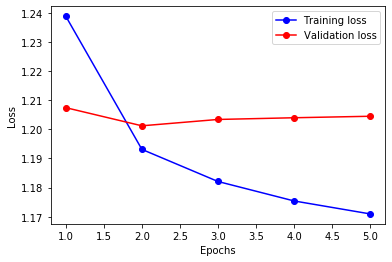

In [19]:
%pylab inline

epoch_range = range(1, epochs+1)

plt.plot(epoch_range, history.history['loss'], 'bo-', label='Training loss')
plt.plot(epoch_range, history.history['val_loss'], 'ro-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

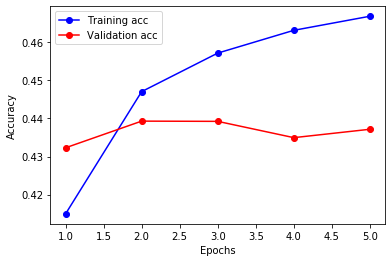

In [20]:
#plt.plot(epoch_range, history.history['mae'], 'bo-', label='Training MAE')
#plt.plot(epoch_range, history.history['val_mae'], 'ro-', label='Validation MAE')
plt.plot(epoch_range, history.history['acc'], 'bo-', label='Training acc')
plt.plot(epoch_range, history.history['val_acc'], 'ro-', label='Validation acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
model.evaluate(test_sequences, test_labels, verbose=2)

53766/53766 - 1s - loss: 1.2028 - acc: 0.4410


[1.2027829031333572, 0.44102222]

In [22]:
predictions = model.predict(test_sequences)

In [38]:
max_test_labels = np.argmax(test_labels, axis=1)
max_predictions = np.argmax(predictions, axis=1)

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(max_test_labels, max_predictions).T
print(cm)

[[8627 4563 2174  786]
 [2309 2933 2313 1220]
 [2204 3304 4657 3766]
 [1143 2264 4008 7495]]


In [29]:
target_names = []

temp = [-1] + split_values + ['']
for i in range(len(temp)-1):
    target_names.append(f'{temp[i]+1}-{temp[i+1]}')
    
target_names

['0-6', '7-16', '17-36', '37-']

In [41]:
from sklearn.metrics import classification_report

cr = classification_report(max_test_labels, max_predictions, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

         0-6       0.53      0.60      0.57     14283
        7-16       0.33      0.22      0.27     13064
       17-36       0.33      0.35      0.34     13152
         37-       0.50      0.56      0.53     13267

    accuracy                           0.44     53766
   macro avg       0.43      0.44      0.43     53766
weighted avg       0.43      0.44      0.43     53766



In [43]:
from sklearn.metrics import cohen_kappa_score

cks = cohen_kappa_score(max_test_labels, max_predictions)
cks

0.25344190158258384

In [49]:
from tensorflow_addons.metrics.cohens_kappa import CohenKappa

m = CohenKappa(num_classes=4)
m.update_state(test_labels, predictions)
print('Final result: ', m.result().numpy())

Final result:  0.253442
